# Jordan Taylor
# Week 05 Exercises
### 5.1 Dissolving and Aggregating Data
Let's revisit the dataset from last week, the Justice Equity Need Index (JENI) identifies ZIP Codes in greatest need of public investments in community healing, health, and prevention to help reverse historical injustices. You can access this dataset by navigating to ```data/Justice_Equity_Need_Index.geojson```

Let's start doing some spatial analysis.

1. Load the JENI dataset and view the first few rows. You will notice a column ```sup_dist``` which designates the district number associated with each zip code block. Dissolve by the districts column and use and aggregation function to find the mean ```jenipctl```. 
2. Create a map that displays the dissolved dataframe with a lengend showing the districts and the mean ```jenipctl```
3. Write a meaningful caption of the map you have created. Refer back to last week's homework for additional information on what exactly the ```jenipctl``` means.


In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon

Part 1

In [4]:
fp = "data/Justice_Equity_Need_Index.geojson"
data = gpd.read_file(fp)
data.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
0,1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,District 5,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,District 4,SPA 7 - East,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,3,90274,Lowest,0.7,275,Lowest,3.6,Lowest,0.0,Lowest,7.2,Palos Verdes Estates,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,District 3,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,5,90275,Lowest,1.4,273,Lowest,6.8,Lowest,3.6,Lowest,6.2,Rancho Palos Verdes,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."


In [5]:
districts = data[['sup_dist','jenipctl','geometry']]
aggregation = districts.dissolve(by='sup_dist', aggfunc='mean')
aggregation

,geometry,jenipctl
sup_dist,,
District 1,"MULTIPOLYGON (((-118.18311 33.99633, -118.1833...",60.502222
District 2,"POLYGON ((-118.37791 33.85345, -118.37791 33.8...",65.157143
District 3,"POLYGON ((-118.52451 34.03052, -118.52502 34.0...",38.586667
District 4,"MULTIPOLYGON (((-118.17124 33.76274, -118.1725...",51.292857
District 5,"POLYGON ((-118.31103 34.10656, -118.31103 34.1...",41.464286


Part 2 & 3

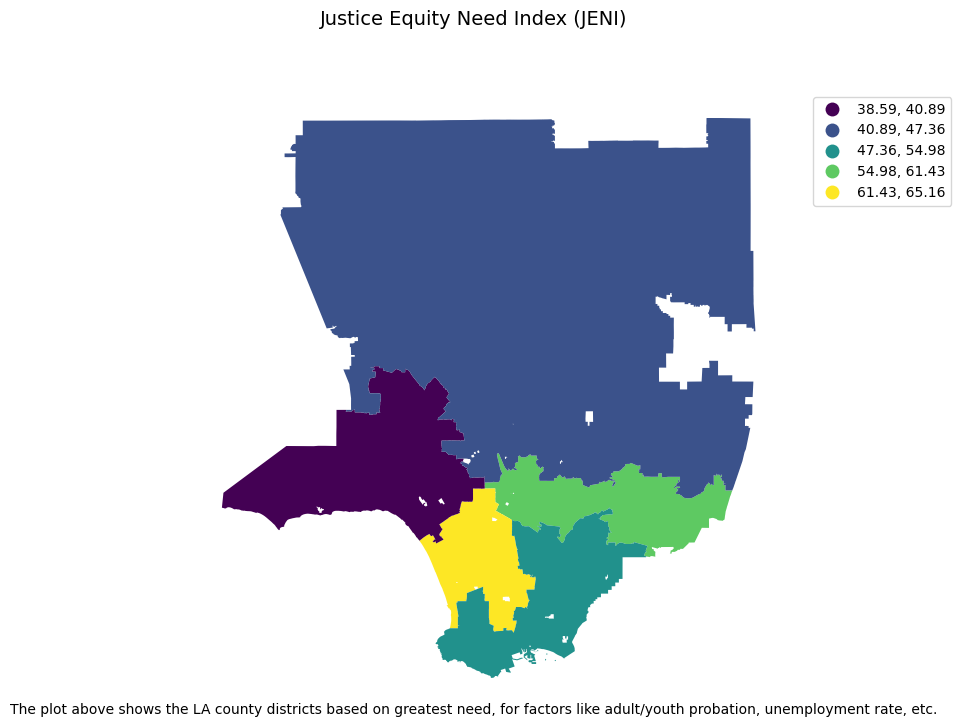

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

aggregation.plot(column = 'jenipctl',
                 legend=True,
                 scheme="quantiles",
                 ax=ax)

plt.suptitle('Justice Equity Need Index (JENI)', fontsize=14)

leg = ax.get_legend()

leg.set_bbox_to_anchor((1.3,1))

ax.set_axis_off()

#adding a caption to the bottom of the plot
txt="The plot above shows the LA county districts based on greatest need, for factors like adult/youth probation, unemployment rate, etc."
plt.figtext(0.5, 0.1, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

### 5.2 Spatial Joining
Let's use the same ```data/Justice_Equity_Need_Index.geojson``` and do an analysis just for the neighborhoods within the city of Long Beach. You have been provided two additional datasets. First is the boundary of Long Beach: ```data/LB_City_Boundary.geojson``` and the second is Long Beach neighborhoods: ```data/LB_Neighborhoods.geojson```

1. Clip the original ```data/Justice_Equity_Need_Index.geojson``` by the city of Long Beach boundary. What should you always first check before working with multiple datasets?
2. Using the clipped version of the JENI dataset, spatially join the ```data/LB_Neighborhoods.geojson``` and your clipped dataset. 
3. Make a map that has different color categories for each Long Beach neighborhood by the ```jenipctl```.
4. Write a meaningful caption describing the patterns you see in Long Beach neighorboods ```jenipctl``` rankings. 


Part 1

Clipping the boundary and checking the CRS types. You should always check the CRS types before working with multiple datasets.

In [7]:
lbc = 'data/LB_City_Boundary.geojson'
lbn = 'data/LB_Neighborhoods.geojson'
lb_boundary = gpd.read_file(lbc)
lb_neighborhoods = gpd.read_file(lbn)

In [8]:
#checking the CRS types

print(lb_boundary.crs)
print(lb_neighborhoods.crs)
print(aggregation.crs)
print(data.crs)

epsg:4326
epsg:4326
epsg:4326
epsg:4326


In [9]:
lb_neighborhoods

,OBJECTID,NEIGHBOR_NAME,GlobalID,created_user,created_date,last_edited_user,last_edited_date,SHAPE_Length,SHAPE_Area,geometry
0,1,East Village,{F64F07BE-5FA5-410D-88C1-B66CA53D38DF},None,NaT,None,NaT,0.033715,0.000069,"MULTIPOLYGON (((-118.18702 33.77534, -118.1863..."
1,2,Bluff Heights,{99E88FB4-E7F9-4AC3-B341-AB8E56AE9A31},None,NaT,None,NaT,0.041252,0.000067,"MULTIPOLYGON (((-118.15569 33.77171, -118.1545..."
2,3,Stoney Brook,{09F3E3ED-8CA1-41C5-AD87-1B1E2EEA7231},None,NaT,None,NaT,0.012744,0.000009,"MULTIPOLYGON (((-118.12099 33.77406, -118.1197..."
3,4,Bluff Park,{B817207F-7E13-47F8-BF14-41EB6EEC6AD8},None,NaT,None,NaT,0.041761,0.000066,"MULTIPOLYGON (((-118.15353 33.76444, -118.1524..."
4,5,CSULB,{34BB6FE3-315A-4B47-8578-DF606C9FDFA0},None,NaT,None,NaT,0.059820,0.000176,"MULTIPOLYGON (((-118.10798 33.78870, -118.1079..."
...,...,...,...,...,...,...,...,...,...,...
121,122,Unassigned (LA River),{2CFC2990-C4EC-40CD-B0CE-26B868741C3D},None,NaT,None,NaT,0.017809,0.000012,"MULTIPOLYGON (((-118.18989 33.87437, -118.1907..."
122,123,Unassigned (Marine Stadium),{84B3FC61-FD76-4011-BE35-482ED6FA4545},None,NaT,MEMCNER,2022-07-28 20:11:45+00:00,0.062103,0.000037,"MULTIPOLYGON (((-118.12380 33.76473, -118.1236..."
123,124,Unassigned (Coyote Creek),{206301F2-0B5F-48A4-A14C-951C1DEBEBCC},None,NaT,None,NaT,0.030925,0.000017,"MULTIPOLYGON (((-118.08765 33.79469, -118.0889..."
124,125,Winward Pointe,{A2750441-DDCA-42F4-B562-52048BCBE5CE},MEMCNER,2022-07-28 17:39:51+00:00,MEMCNER,2022-07-28 17:41:25+00:00,0.007930,0.000002,"MULTIPOLYGON (((-118.12416 33.76958, -118.1241..."


Part 2

In [11]:
data_clipped = gpd.clip(lb_boundary, data)
data_clipped

/opt/tljh/user/lib/python3.9/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


,OBJECTID,CITYNAME,CITYCODE,SHAPE_Length,SHAPE_Area,geometry
0,1,LONG BEACH,CLB,1.232684,0.01338,"MULTIPOLYGON (((-118.18174 33.88541, -118.1788..."


In [12]:
lb_joined = gpd.sjoin(lb_neighborhoods, data, how = 'inner', op = 'intersects')
lb_joined.head()

/opt/tljh/user/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,OBJECTID_left,NEIGHBOR_NAME,GlobalID,created_user,created_date,last_edited_user,last_edited_date,SHAPE_Length_left,SHAPE_Area_left,geometry,...,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length_right,SHAPE_Area_right
0,1,East Village,{F64F07BE-5FA5-410D-88C1-B66CA53D38DF},None,NaT,None,NaT,0.033715,0.000069,"MULTIPOLYGON (((-118.18702 33.77534, -118.1863...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
5,6,Willmore,{1ACDFFF5-68A5-4A02-B766-9B9546CA4DFE},None,NaT,None,NaT,0.037115,0.000075,"MULTIPOLYGON (((-118.20467 33.77650, -118.2046...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
38,39,Saint Mary's,{08EF8122-27A6-493C-AFB6-2CAAFAC9CD01},None,NaT,None,NaT,0.044193,0.000106,"MULTIPOLYGON (((-118.18939 33.78259, -118.1886...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
39,40,Rose Park,{AEE872EB-E17F-47B4-B670-23F5ED5E08EA},None,NaT,None,NaT,0.044998,0.000111,"MULTIPOLYGON (((-118.16550 33.77898, -118.1644...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
40,41,West Village,{CE22A43B-FF85-4988-8965-0698278FC88F},None,NaT,None,NaT,0.035150,0.000067,"MULTIPOLYGON (((-118.20314 33.77559, -118.2023...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523


Part 3

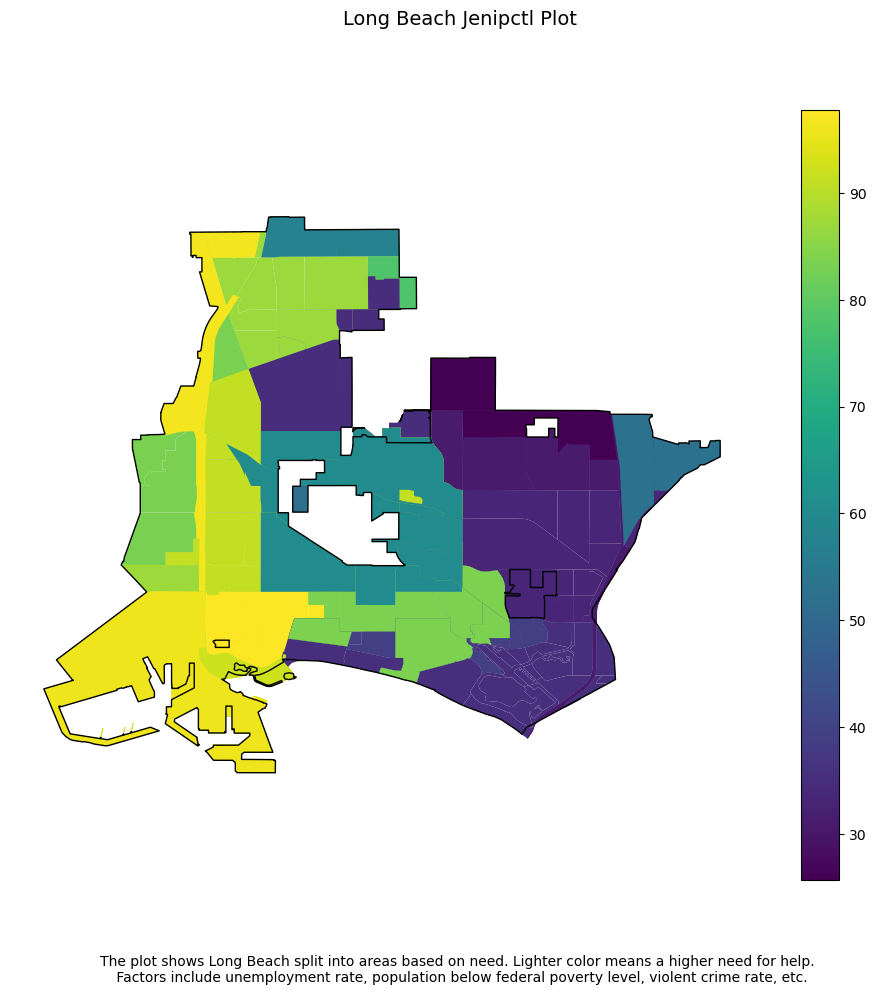

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))

data_clipped.plot(alpha=1,
                  edgecolor="black",
                  facecolor="none",
                  zorder=10,
                  ax=ax)

lb_joined.plot(column='jenipctl',
               ax=ax,
               legend=True)

plt.suptitle('Long Beach Jenipctl Plot', fontsize=14)

leg = ax.get_legend()

ax.set_axis_off()

#adding a caption to the bottom of the plot
txt="The plot shows Long Beach split into areas based on need. Lighter color means a higher need for help. \n Factors include unemployment rate, population below federal poverty level, violent crime rate, etc."
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)

plt.axis('equal')
plt.show()

### 5.3 Calculating Distances
Let's calculate the distance by bird's flight (straight lines) from campus to each zip code. The coordinates of LMU's campus are: 33.9710, -118.4170.

1. The JENI dataset we have been working with has information already grouped by zip code. Load the JENI dataset and select only the ```zip``` and ``` csa ``` columns. 
2. Create the point for LMU's campus assuming the CRS to be ```epsg:4326```. Reproject this point to ```epsg:3857```.
3. Find the centroids of the zip code and city name dataframe (the subset from the JENI dataframe). Did you receive a warning? What should you do?
4. Using the following function, calculate the distance from the LMU campus to each zip code. 
5. What is the maximum distance from the LMU campus? Which zip code does this pertain to? What is the average distace to the LMU campus?

Part 1

In [14]:
data_new = data[['zip', 'csa', 'geometry']]
data_new

,zip,csa,geometry
0,91108,City of San Marino,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,90631,City of La Habra Heights,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,90274,City of Rancho Palos Verdes,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,91361,City of Westlake Village,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,90275,City of Rancho Palos Verdes,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."
...,...,...,...
276,90037,Los Angeles - West Vernon,"MULTIPOLYGON (((-118.28882 34.01835, -118.2878..."
277,90061,Unincorporated - Athens Village,"MULTIPOLYGON (((-118.27330 33.93924, -118.2733..."
278,90059,Unincorporated - Willowbrook,"MULTIPOLYGON (((-118.26514 33.91157, -118.2645..."
279,90014,Los Angeles - Downtown,"MULTIPOLYGON (((-118.25468 34.04862, -118.2544..."


Part 2

In [15]:
data_new.isnull().sum()

zip         0
csa         3
geometry    0
dtype: int64

In [16]:
data_new_2 = data_new.copy()

In [17]:
data_new_2['csa'] = data_new_2['csa'].fillna("Unknown")


In [18]:
from shapely.geometry import Point, LineString, Polygon

lmu_lat = 33.966492
lmu_lon = -118.422913

lmu = gpd.GeoDataFrame([[Point(lmu_lon, lmu_lat)]], geometry='geometry', crs={'init': 'epsg:4326'}, columns=['geometry'])

/opt/tljh/user/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [19]:
print(data_new_2.crs)
print(lmu.crs)

epsg:4326
+init=epsg:4326 +type=crs


In [20]:
#converting lmu to 3857 and reprojecting it

lmu_reprojected = lmu.to_crs(3857)

print(lmu_reprojected.crs)

epsg:3857


In [21]:
#converting the data_new_2 crs projection from 4326 to 3857

projected_data = data_new_2.to_crs(3857)

In [22]:
projected_data['centroid'] = projected_data.centroid
projected_data.head()

,zip,csa,geometry,centroid
0,91108,City of San Marino,"MULTIPOLYGON (((-13147794.179 4047256.800, -13...",POINT (-13148349.834 4045245.070)
1,90631,City of La Habra Heights,"MULTIPOLYGON (((-13129326.139 4025429.029, -13...",POINT (-13130220.945 4023406.404)
2,90274,City of Rancho Palos Verdes,"MULTIPOLYGON (((-13179177.697 4002548.915, -13...",POINT (-13176716.971 3998944.034)
3,91361,City of Westlake Village,"MULTIPOLYGON (((-13224787.024 4048688.878, -13...",POINT (-13228375.469 4046330.223)
4,90275,City of Rancho Palos Verdes,"MULTIPOLYGON (((-13179462.784 3993751.501, -13...",POINT (-13176234.604 3996054.498)


Part 3

In [23]:
lmu_reprojected_geom = lmu_reprojected.loc[0, 'geometry']
print(lmu_reprojected_geom)

POINT (-13182778.373416137 4024303.607337671)


Part 4

In [24]:
def calculate_distance(row, dest_geom, src_col='geometry', target_col='distance'):
    """
    Calculates the distance between Point geometries.

    Parameters
    ----------
    dest_geom : shapely.Point
       A single Shapely Point geometry to which the distances will be calculated to.
    src_col : str
       A name of the column that has the Shapely Point objects from where the distances will be calculated from.
    target_col : str
       A name of the target column where the result will be stored.

    Returns
    -------
    
    Distance in kilometers that will be stored in 'target_col'.
    """
    
    # Calculate the distances
    dist = row[src_col].distance(dest_geom)

    # Convert into kilometers
    dist_km = dist / 1000

    # Assign the distance to the original data
    row[target_col] = dist_km
    return row

In [25]:
projected_data = projected_data.apply(calculate_distance,
                                      dest_geom = lmu_reprojected_geom,
                                      src_col ='centroid',
                                      target_col = 'dist_to_lmu',
                                      axis=1)
print(projected_data.head(10))

     zip                          csa  \
0  91108           City of San Marino   
1  90631     City of La Habra Heights   
2  90274  City of Rancho Palos Verdes   
3  91361     City of Westlake Village   
4  90275  City of Rancho Palos Verdes   
5  90077        Los Angeles - Bel Air   
6  91436         Los Angeles - Encino   
7  90094    Los Angeles - Playa Vista   
8  91007              City of Arcadia   
9  90049      Los Angeles - Brentwood   

                                            geometry  \
0  MULTIPOLYGON (((-13147794.179 4047256.800, -13...   
1  MULTIPOLYGON (((-13129326.139 4025429.029, -13...   
2  MULTIPOLYGON (((-13179177.697 4002548.915, -13...   
3  MULTIPOLYGON (((-13224787.024 4048688.878, -13...   
4  MULTIPOLYGON (((-13179462.784 3993751.501, -13...   
5  MULTIPOLYGON (((-13186404.303 4046875.374, -13...   
6  MULTIPOLYGON (((-13190575.702 4053817.268, -13...   
7  MULTIPOLYGON (((-13180371.303 4026623.785, -13...   
8  MULTIPOLYGON (((-13141322.535 4048747.758

Part 5

In [26]:
#Finding the average distance

mean_dist = projected_data['dist_to_lmu'].mean()
print("Average distance to LMU campus is %.1f km" %mean_dist)

Average distance to LMU campus is 35.8 km


In [40]:
#Finding the max distance from LMU and the corresponding zipcode

#Unsure how to find the corresponding zip code for the 117.67 km
#Tried searching "locating adjacent cell in python dataframe"

max_dist = projected_data['dist_to_lmu'].max()
print("Max distance to LMU campus is %.2f km" %max_dist)

Max distance to LMU campus is 117.67 km
